## exercise 1

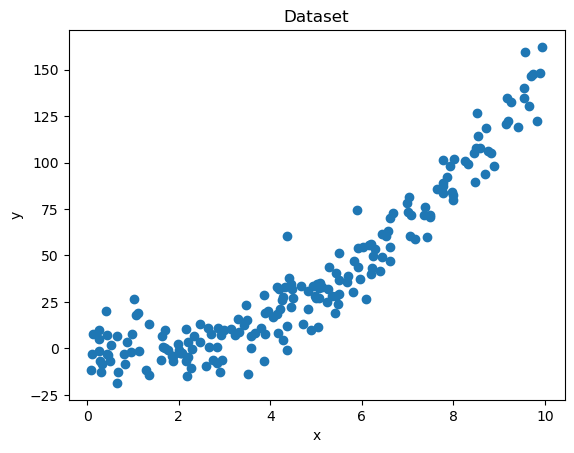

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, root_mean_squared_error

np.random.seed(2)

#generate the data
x=np.random.uniform(0,10,200)
y=2*x**2-5*x+3+np.random.normal(0,10,200)

#plot the data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [188]:
def power_fitting(x,ඞ):
    outp=pd.DataFrame(x)
    for p in range(2,ඞ+1):
        outp=pd.concat([outp,pd.DataFrame(x**p)],axis=1)
    return outp

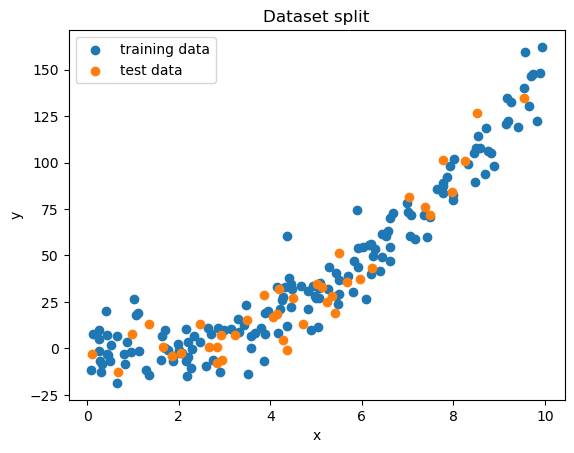

In [189]:
from sklearn.model_selection import train_test_split
#split the data for training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.8,random_state=2)
#plot split data
plt.scatter(xtrain,ytrain,label='training data')
plt.scatter(xtest,ytest,label='test data')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Dataset split'); plt.legend()
plt.show()

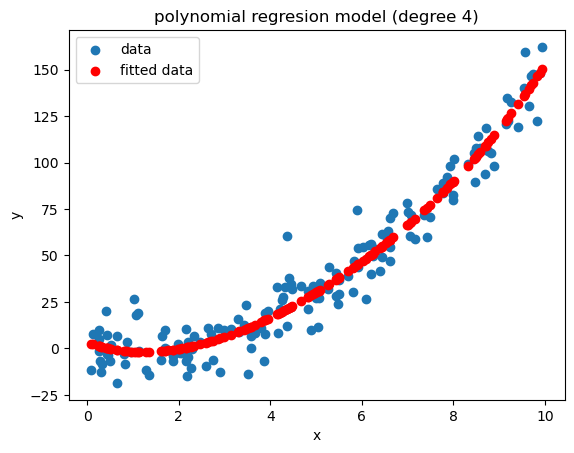

In [190]:
#fit the regresion model
#train_x_p1=pd.DataFrame(xtrain)
#train_x_p2=pd.DataFrame(xtrain**2)

#create polynomial features
train_x_poly=power_fitting(xtrain,4)

#fit the ols model
X=sm.add_constant(train_x_poly)
model=sm.OLS(ytrain,X)
result=model.fit()

#obtain predicted values
predict_train_y=result.predict()

#plot
plt.scatter(xtrain,ytrain,label='data'); plt.scatter(xtrain,predict_train_y,color='red',label='fitted data')
plt.xlabel('x'); plt.ylabel('y'); plt.title('polynomial regresion model (degree 4)'); plt.legend()
plt.show()


In [86]:
#repeat steps for test data
#fit the regresion model
#test_x_p1=pd.DataFrame(xtest)
#test_x_p2=pd.DataFrame(xtest**2)

#create polynomial features
test_x_poly=power_fitting(xtest,4)

#fit the ols model
X=sm.add_constant(test_x_poly)
model=sm.OLS(ytest,X)
result=model.fit()

#obtain predicted values
predict_test_y=result.predict()

#fit the model on the training data
r_squared_test=result.rsquared
r_squared_test_adj=result.rsquared_adj
r_squared_score=r2_score(ytest,predict_test_y)
mse=root_mean_squared_error(ytest,predict_test_y)**2
print(r_squared_test_adj,r_squared_score,mse)
print('the r2adj is highest with a fourth power polynomial so were fitting with that.')

0.9291283918588195 0.9363972747450944 88.40500595084863
the r2adj is highest with a fourth power polynomial so were fitting with that.


## exercise 2

In [191]:
df=pd.read_csv('winequality-red.csv',sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


#### after having turned all data into boxplots it was concludes that no data was missing, all data was numerical and that no outliers were an error. happy days.

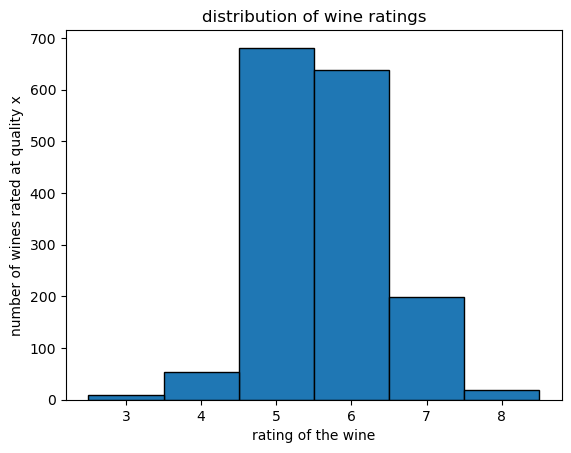

In [192]:
#visualize the quality
plt.bar(df.quality.unique(),df.quality.value_counts(),edgecolor='black',width=1) #histograms are dead and bar plots have killed them
plt.xlabel('rating of the wine'); plt.ylabel('number of wines rated at quality x'); plt.title('distribution of wine ratings')
plt.show()

In [193]:
#split the data into train and test data with quality as the y. a train size of 0.9 is being used, there is no reason why spicificly 0.9
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('quality',axis=1),df['quality'], train_size=0.9,random_state=2)

In [208]:
#plot training data

#create polynomial features
degree=4
test_x_poly=power_fitting(xtrain,degree)

#fit the ols model
X=sm.add_constant(test_x_poly)
model=sm.OLS(ytest,X)
result=model.fit()

#obtain predicted values
predict_test_y=result.predict()

#fit the model on the training data
r_squared_test=result.rsquared
r_squared_test_adj=result.rsquared_adj
r_squared_score=r2_score(ytest,predict_test_y)
mse=root_mean_squared_error(ytest,predict_test_y)**2
print(r_squared_test_adj,r_squared_score,mse)

ValueError: The indices for endog and exog are not aligned

In [212]:
X

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
694,1.0,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,...,0.048797,9.235210e-03,53.1441,0.000050,331776.0,244140625.0,0.993615,120.036127,0.138458,7807.4896
990,1.0,7.7,0.39,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,...,0.023134,2.073600e-04,8.3521,0.000089,130321.0,531441.0,0.983938,99.712207,0.057648,7807.4896
1268,1.0,6.9,0.41,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,...,0.028258,9.235210e-03,16.0000,0.000039,194481.0,6765201.0,0.986786,144.983273,0.091506,8145.0625
417,1.0,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,...,0.113165,2.073600e-04,13.0321,0.000069,1336336.0,236421376.0,0.982516,140.034089,0.053084,12155.0625
1552,1.0,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,...,0.213814,1.000000e-08,187.4161,0.000113,1048576.0,8503056.0,0.983543,151.784864,0.189747,16304.7361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,...,0.201511,1.296000e-05,19.4481,0.000041,4096.0,1185921.0,0.993814,183.396598,0.254117,8493.4656
1558,1.0,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,...,0.157530,1.185921e-02,2015.1121,0.003050,18974736.0,174900625.0,0.991507,107.503719,0.098345,8145.0625
493,1.0,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,...,0.226671,9.235210e-03,81.0000,0.000055,279841.0,43046721.0,1.000800,146.661788,0.299866,18106.3936
527,1.0,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,...,0.020851,5.764801e-02,39.0625,0.000089,1185921.0,52200625.0,0.984886,132.068362,0.351530,16889.6016


## exercise 3